In [1]:
import pandas as pd

DATA_PATH: str = '../data/imdb'

In [2]:
# load full dataset
train: pd.DataFrame = pd.read_csv(f'{DATA_PATH}.train.csv')
train

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
39659,Dr. Lucio Fulci (Lucio Fulci) is a director of...,negative
39660,Yes I admit I cried during this movie. It was ...,negative
39661,I've bought certain films on disc even though ...,positive
39662,The final pairing of Nelson Eddy and Jeanette ...,negative


# Show most-used non-alphanumeric symbol

<AxesSubplot:title={'center':'Occurrence of Punctuation'}>

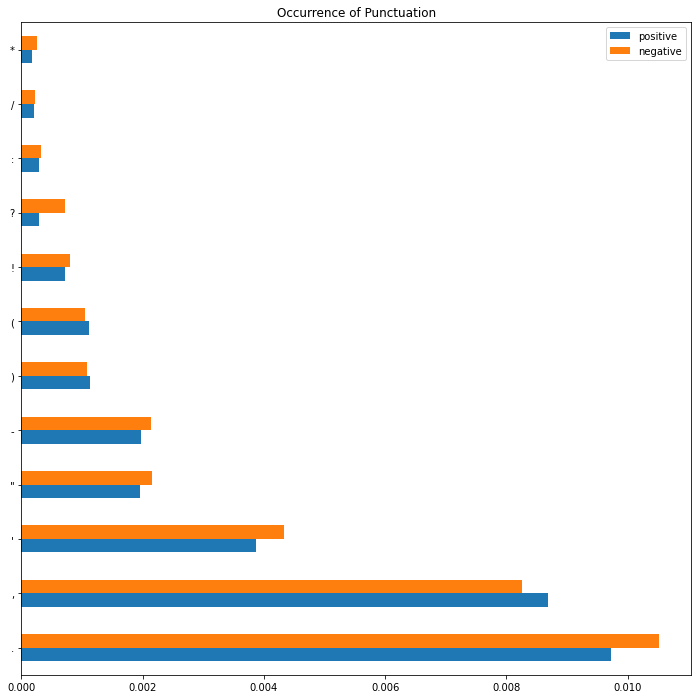

In [3]:
(
    pd.DataFrame({
        label: (
            train.iloc[ids]['review']
            .apply(lambda s: list(s))
            .explode()
            .value_counts(normalize=True)
            .filter(regex=rf'[^\s\d\w]')
        )
        for label, ids in train.groupby('sentiment').groups.items()
    })
    .assign(sum=lambda x: x.sum(axis='columns'))
    .sort_values(by=['sum'], ascending=False)
    [['positive', 'negative']]
    .head(12)
    .plot.barh(
        title='Occurrence of Punctuation',
        figsize=(12,12)
    )
)